In [2]:
!pip install tensorflow

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
  Using cached tensorboa

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

google-auth 2.18.1 requires urllib3<2.0, but you'll have urllib3 2.0.2 which is incompatible.
You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
!pip install matplotlib


In [2]:
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import os
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import pydot

In [ ]:
# Akses Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Cek data Train
for expression in os.listdir(r'C:/Users/user/bangkit2023/model_fadil/dataset/train'):
    print(str(len(os.listdir(r'C:/Users/user/bangkit2023/model_fadil/dataset/train/' + expression))) + " " + expression + " images")


15 beresiko images
8 kolesterol images
6 normal images


In [5]:
# Cek data Test
for expression in os.listdir(r'C:/Users/user/bangkit2023/model_fadil/dataset/test'):
    print(str(len(os.listdir(r'C:/Users/user/bangkit2023/model_fadil/dataset/test/' + expression))) + " " + expression + " images")


4 beresiko images
2 kolestrol images
1 normal images


In [8]:
img_size = 48
batch_size = 3
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("C:/Users/user/bangkit2023/model_fadil/dataset/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("C:/Users/user/bangkit2023/model_fadil/dataset/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 29 images belonging to 3 classes.
Found 7 images belonging to 3 classes.


In [9]:
train_generator.image_shape, validation_generator.image_shape

((48, 48, 1), (48, 48, 1))

# CREATE A MODEL WITHOUT PRE-TRAINED


In [10]:
# Initialising the CNN
model = Sequential()
# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())
# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [11]:
opt = Adam(learning_rate=0.0005) #ini yg diubah dari lr become learning_rate
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from IPython.display import SVG, Image
from livelossplot.inputs.tf_keras import PlotLossesCallback

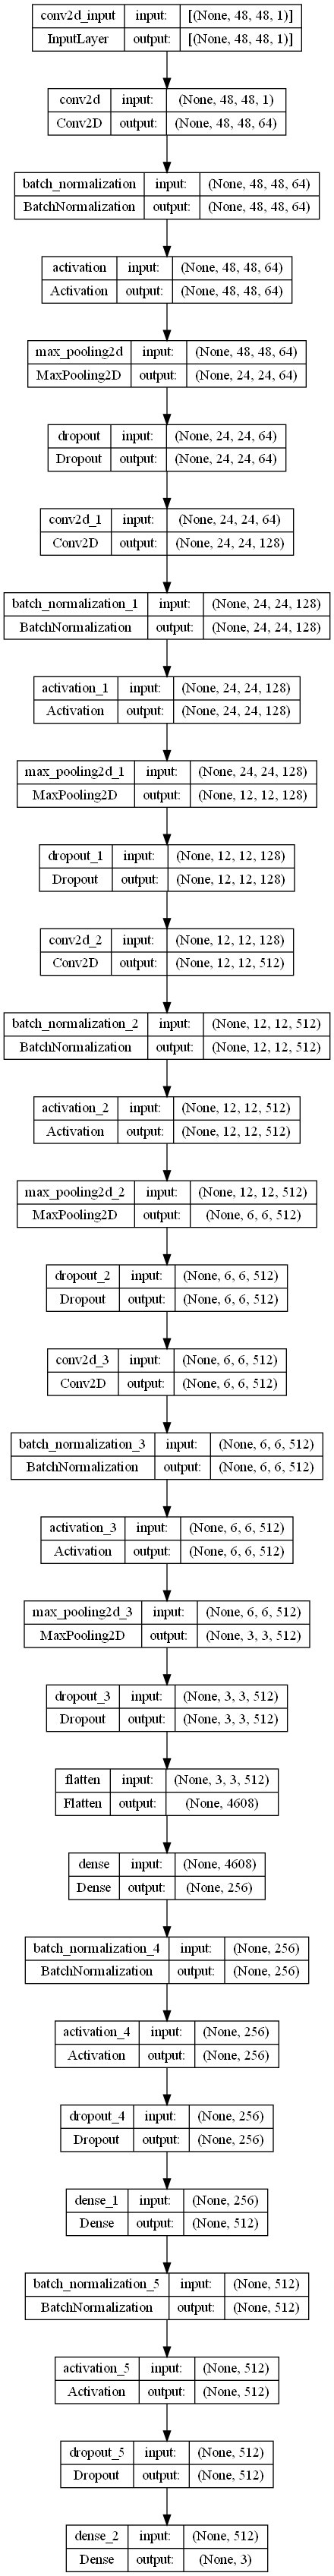

In [13]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=800, height=2500)

In [ ]:
from keras.callbacks import Callback

class MyCallback(Callback):
    def on_train_begin(self, logs=None):
        print("Training is started!")

    def on_train_end(self, logs=None):
        print("Training is finished!")

    def on_epoch_begin(self, epoch, logs=None):
        print(f"Epoch {epoch+1} is started!")

    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1} is finished!")
        print("Logs:", logs)

    def on_batch_begin(self, batch, logs=None):
        print(f"Batch {batch+1} is started!")

    def on_batch_end(self, batch, logs=None):
        print(f"Batch {batch+1} is finished!")

# Contoh penggunaan callback
model.fit(train_generator, epochs=15, callbacks=[MyCallback()], validation_data = validation_generator)

Training is started!
Epoch 1 is started!
Epoch 1/15
Batch 1 is started!
Batch 1 is finished!
1/1 [==============================] - ETA: 0s - loss: 0.3803 - accuracy: 0.8276Epoch 1 is finished!
Logs: {'loss': 0.38027316331863403, 'accuracy': 0.8275862336158752, 'val_loss': 5.144832134246826, 'val_accuracy': 0.5714285969734192}
1/1 [==============================] - 2s 2s/step - loss: 0.3803 - accuracy: 0.8276 - val_loss: 5.1448 - val_accuracy: 0.5714
Epoch 2 is started!
Epoch 2/15
Batch 1 is started!
Batch 1 is finished!
1/1 [==============================] - ETA: 0s - loss: 0.3538 - accuracy: 0.9310Epoch 2 is finished!
Logs: {'loss': 0.35383978486061096, 'accuracy': 0.931034505367279, 'val_loss': 5.795003414154053, 'val_accuracy': 0.5714285969734192}
1/1 [==============================] - 2s 2s/step - loss: 0.3538 - accuracy: 0.9310 - val_loss: 5.7950 - val_accuracy: 0.5714
Epoch 3 is started!
Epoch 3/15
Batch 1 is started!
Batch 1 is finished!
1/1 [==============================] - E

In [14]:
print(train_generator.n//train_generator.batch_size)
print(validation_generator.n//validation_generator.batch_size)

9
2


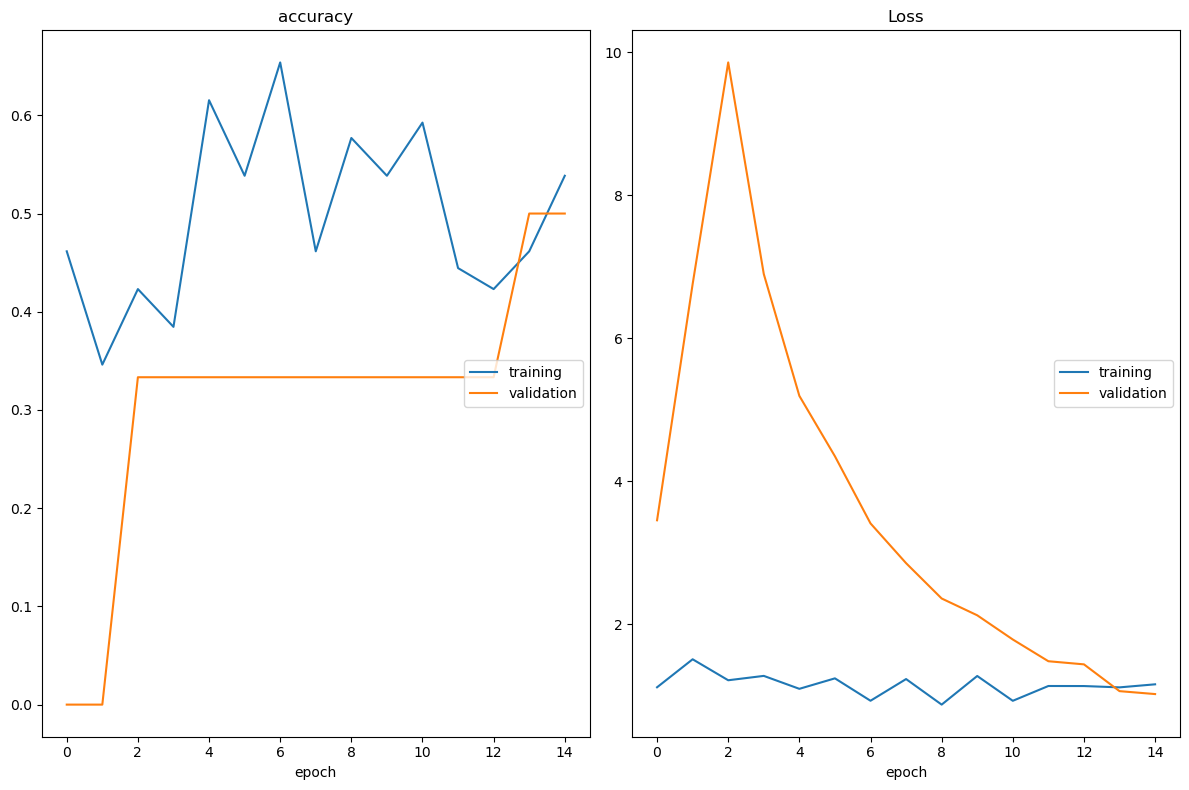

accuracy
	training         	 (min:    0.346, max:    0.654, cur:    0.538)
	validation       	 (min:    0.000, max:    0.500, cur:    0.500)
Loss
	training         	 (min:    0.878, max:    1.512, cur:    1.162)
	validation       	 (min:    1.026, max:    9.857, cur:    1.026)

Epoch 15: saving model to model_weights.h5
9/9 [==============================] - 2s 247ms/step - loss: 1.1619 - accuracy: 0.5385 - val_loss: 1.0256 - val_accuracy: 0.5000 - lr: 1.0000e-05
CPU times: total: 1min 45s
Wall time: 31.9 s


In [15]:
%%time
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=False, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

# CREATE MODEL WITH PRE-TRAINED


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
img_size = 48
batch_size = 3
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("/content/drive/MyDrive/BANGKIT 2023/CAPSTONE/MODEL/dataset/duplicate/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("/content/drive/MyDrive/BANGKIT 2023/CAPSTONE/MODEL/dataset/duplicate/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 58 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [ ]:
train_generator.image_shape, validation_generator.image_shape

((48, 48, 3), (48, 48, 3))

In [ ]:
model = Sequential()
# add pre-trained model
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))

# add fully Connected Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# set ResNet Layer is not trainable
model.layers[0].trainable=False

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 3)                 

In [ ]:
opt = Adam(learning_rate=0.0005) #ini yg diubah dari lr become learning_rate
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

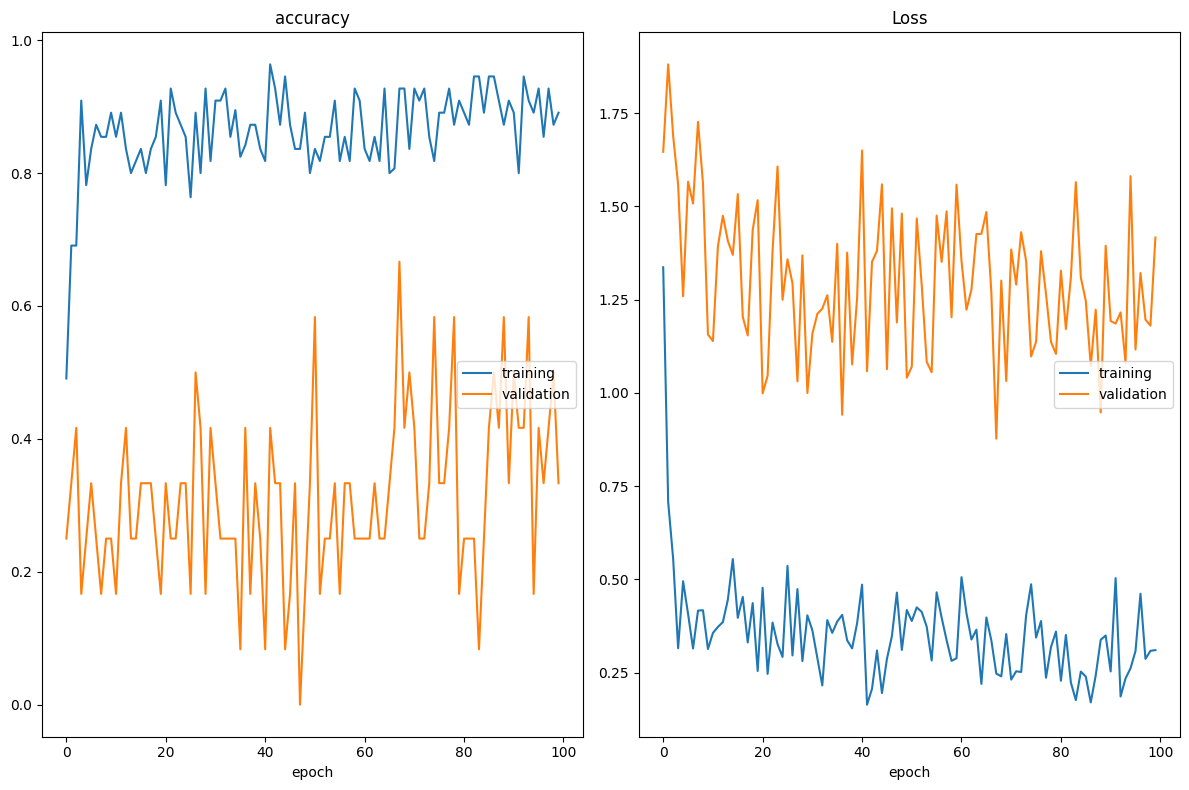

accuracy
	training         	 (min:    0.491, max:    0.964, cur:    0.891)
	validation       	 (min:    0.000, max:    0.667, cur:    0.333)
Loss
	training         	 (min:    0.164, max:    1.337, cur:    0.310)
	validation       	 (min:    0.877, max:    1.881, cur:    1.416)

Epoch 100: saving model to model_weights.h5
19/19 [==============================] - 12s 618ms/step - loss: 0.3100 - accuracy: 0.8909 - val_loss: 1.4164 - val_accuracy: 0.3333 - lr: 1.0000e-05
CPU times: user 24min 4s, sys: 1min 24s, total: 25min 29s
Wall time: 29min 39s


In [ ]:
%%time
epochs = 100
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=False, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [ ]:
from keras.models import save_model

In [ ]:
model_json = model.to_json()
model.save_weights('model_weights.h5')
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save('/content/drive/MyDrive/BANGKIT 2023/CAPSTONE/MODEL/model/model_complete.h5')

# UNTUK PREDICT

In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf

In [ ]:
# Fungsi untuk memuat model
def load_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

In [ ]:
# Fungsi untuk memuat dan memproses gambar
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((48, 48))  # Ubah ukuran gambar sesuai dengan model
    image = image.convert("L")  # Ubah gambar menjadi skala keabuan
    image = np.array(image) / 255.0  # Normalisasi piksel antara 0 dan 1
    image = np.expand_dims(image, axis=0)  # Tambahkan dimensi batch
    return image

In [ ]:
# Fungsi untuk memprediksi gambar menggunakan model
def predict_image(image_path, model):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    return predictions

In [ ]:
image_dir = "/content/drive/MyDrive/BANGKIT 2023/CAPSTONE/MODEL/dataset/test/normal"
model_path = "/content/model_weights.h5"
model = load_model(model_path)

In [ ]:
# Melakukan prediksi untuk setiap gambar di direktori
for filename in os.listdir(image_dir):
    if filename.endswith(".bmp") or filename.endswith(".png"):
        image_path = os.path.join(image_dir, filename)
        predictions = predict_image(image_path, model)
        predicted_class = np.argmax(predictions)  # Ambil indeks kelas dengan probabilitas tertinggi
        print("Gambar:", filename)
        print("Prediksi:", predicted_class)
        print("Probabilitas:", predictions[0][predicted_class])
        print()

1/1 [==============================] - 0s 327ms/step
Gambar: normal-187-25-kanan.bmp
Prediksi: 0
Probabilitas: 0.5646654

